In [7]:
import os
import numpy as np
import sys
import shutil
import subprocess
from scipy.stats import gamma
from scipy.stats import norm
from scipy.signal import argrelextrema
from scipy import integrate
from scipy import interpolate
from scipy import optimize
from scipy.interpolate import LinearNDInterpolator
import pandas as pd
import time
import pickle
import multiprocessing 
import random

#import mesa_reader as mr
#from mesa_reader import *
#from mesa_data import *
import itertools
import math
import re
import pylab as pl
from matplotlib import rc
from matplotlib import lines
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib as mpl
import matplotlib.font_manager
import matplotlib.cm as cm
import matplotlib.ticker
from matplotlib.offsetbox import AnchoredText
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib.font_manager as font_manager

#from scipy import interpolate
#from scipy.interpolate import *
from scipy.signal import find_peaks
#from scipy.interpolate import UnivariateSpline, SmoothBivariateSpline, BivariateSpline, InterpolatedUnivariateSpline


#from scipy.interpolate import splev, splrep, CubicSpline
#from scipy.interpolate import Akima1DInterpolator as ak
#from IPython.utils import io



params = {'backend': 'pdf',
          'font.family':'Lato',
          'font.size':10,
          'font.serif': '',
          'axes.titlesize': 10,
          'axes.labelsize':10,
           'axes.linewidth':0.80,
          'legend.fontsize': 10,
           'figure.dpi': 400,
          'legend.frameon' : False,
          'text.usetex':True ,
          'lines.markersize': 5,
           'lines.markeredgewidth': 0.2,
          'lines.linewidth': 1.0,
          'lines.antialiased': False,
          'path.simplify': False,
          'legend.handlelength':3,
          'figure.subplot.bottom':0.15,
          'figure.subplot.top':0.92,
          'figure.subplot.left':0.15,
          'figure.subplot.right':0.98}
############################################################ fig stuff
mpl.rcParams.update(params)
############################################################


# units
msun= 1.9892e33
Lsun = 3.828e33


my_colors= ['#5e3c99',  '#fdb863','chocolate','#7B3C58']
line =1.0
linestyle =["-",  "--", ":", ":", "-.", "-", "--"]
width =244*1;

from make_plot import make_plot
from make_plot import set_size
from classes_UL import *
from load_data_obs import *

#LOAD SAVED likelihood

#output = open('data_llh_over_posttn.pkl', 'wb')
#pickle.dump(likelihood_over_posterior, output)
#output.close()


pkl_file = open('data_llh_over_posttn.pkl', 'rb')
likelihood_over_posterior = pickle.load(pkl_file)
pkl_file.close()
print(likelihood_over_posterior)

[[6.54408478e-01 7.96564900e-01 1.00000000e+00 ... 1.71684034e-02
  1.55793259e-03 4.43923864e-05]
 [4.81703971e-01 4.87596260e-01 4.99979809e-01 ... 6.27968867e-01
  9.48845671e-01 1.00000000e+00]
 [9.54623757e-01 9.58324116e-01 9.53186893e-01 ... 4.03489948e-01
  2.78362342e-01 1.25719876e-01]
 ...
 [4.66880133e-01 4.56698332e-01 4.77091785e-01 ... 7.84667735e-01
  3.13770212e-01 5.67141529e-02]
 [1.00000000e+00 8.98513026e-01 7.45696650e-01 ... 1.18098800e-01
  1.90887143e-02 9.42465368e-04]
 [8.08113455e-01 9.53109732e-01 8.42581033e-01 ... 2.39148961e-04
  9.45488615e-07 1.89012820e-09]]


In [ ]:
#WRITE TRACKS

start_time = time.time()

#Here I parallelized the code
pool = multiprocessing.Pool(6)

modelliHR = []       
iterabile = []
for mass,omega,overshoot in itertools.product(mass_range,omega_range,overshoot_range):
    folder_path = pathfolder(mass,omega,overshoot,path,postmain)
    my_file = folder_path + "/LOGS/history.track"
#    if os.path.exists(my_file): 
#        continue
#    else:
    iterabile.append((mass,omega,overshoot))   

#        with open('stars_MS/XshootU-LMC_'+starname+'.pkl', 'wb') as outp:
with open('tracks.pkl', 'wb') as outp:
    for result in pool.starmap(HR, iterabile):       
        modelliHR.append(result)
    pickle.dump(modelliHR, outp, pickle.HIGHEST_PROTOCOL)


print( " %s minutes for execution ---" % str(float((time.time() - start_time))/60.0))

In [8]:

steps_mass = 0.025
steps_omega = 0.1
steps_overshoot = 0.5

mass_range = np.arange(0.9,2.075+0.001,steps_mass)
omega_range = np.arange(0.0,0.6+0.001,steps_omega)
overshoot_range = np.arange(0.5,5.0+0.001,steps_overshoot)
           
      
path = "/vol/hal/halraid/luca/models/ULYSSES/tracks/LMCovershoot_"


In [10]:
#data = data_30Dor()
#data = data_Fabian("Fabian_30Dor.data")
#data = data_SMC("SMC.data")
data = data_LMC("LMC.data")


#mock star parameters
#Teff_obs = []
#Teff_obs_sigma = []
#log_L_obs = []
#log_L_obs_sigma = []
#v_rot_obs = []
#v_rot_obs_sigma = []
#Teff_obs.append(27000)
#Teff_obs_sigma.append(1000)
#log_L_obs.append(5)
#log_L_obs_sigma.append(0.2)
#v_rot_obs.append(50)
#v_rot_obs_sigma.append(50)
   


#for star in data:
#    print(star)


#OBSERVATIONAL SAMPLE
#obs_subset = [star for star in data if star[1]<6.5 and star[1]>4.05 and np.log10(star[0])<4.75 and np.log10(star[0])>4.0]
#for i,star in enumerate(obs_subset):
#    if star[2] == 0:
#        obs_subset[i] = [star[0],star[1],120]
        
#obs_subset = [star for star in data if np.log10(star[0])<4.75 and star[0]>20000 and star[1]<6.5]
#obs_subset = [star for star in data if np.log10(star[0])<4.75 and np.log10(star[0])>4.1 and star[1]<6.4 and star[1]>4.05]

#obs_subset = [star for star in data if star[1]<4.5]
#obs_subset = [star for star in data if star[1]>=4.5 and star[1]<5.0]
#obs_subset = [star for star in data if star[1]>=5.0 and star[1]<5.5]
#obs_subset = [star for star in data if star[1]>=5.5 and star[1]<6.4]


obs_subset = [star for star in data]
obs_subset = obs_subset[0:1]

for l,line in enumerate(obs_subset):
    print('Nr.',l,'data:',line)

n_obs = np.arange(len(obs_subset))


name_set = 'XshootU-LMC'
name_set = 'VFTS'


51 132
Nr. 0 data: [44000.0, 5.51, 120.0, '1']


In [19]:
# WRITE BAYESIAN MODELS
start_time = time.time()

counter = 0

#Here I parallelized the code
pool = multiprocessing.Pool(6)


for star in obs_subset:
        model = []       
        starname = star[-1]
        iterabile = []
        for mass,omega,overshoot in itertools.product(mass_range,omega_range,overshoot_range):
            iterabile.append((star,mass,omega,overshoot,path))   

        with open('stars/'+name_set+'_'+starname+'.pkl', 'wb') as outp:
            for result in pool.starmap(modello, iterabile):       
                model.append(result)
            pickle.dump(model, outp, pickle.HIGHEST_PROTOCOL)
        counter+=1
        print('VFTS ',starname, 'count: ', counter/len(n_obs))

time_exe = str(float((time.time() - start_time))/60.0)
if float(time_exe) > 60:
    print( " %s hours for execution ---" % time_exe/60)
else:
    print( " %s minutes for execution ---" % time_exe)


VFTS  1 count:  1.0
 2.189215834935506 minutes for execution ---


In [11]:
#LOAD TRACKS

with open('tracks.pkl', 'rb') as inp:
#    with open('stars/VFTS_'+starname+'.pkl', 'rb') as inp:
        modelHR = pickle.load(inp)

In [21]:
#LOAD BAYESMODELS

start_time = time.time()
counter = 0
model = []

likelihood_over_posterior = np.zeros((len(obs_subset),len(overshoot_range)))

for i,star in enumerate(obs_subset):
    starname = star[-1]
    counter += 1
    print(counter/len(obs_subset), 'VFTS',starname, star[0])
    with open('stars/'+name_set+'_'+starname+'.pkl', 'rb') as inp:
        model.append(pickle.load(inp))

    likelihood_over_posterior[i] = collapse_over_overshoot_posterior(model[i],mass_range,omega_range,overshoot_range,i,'posterior_time_norm')        
#    model[i] = 0
print( " %s minutes for load ---" % str(float((time.time() - start_time))/60.0))



1.0 VFTS 1 44000.0
 0.0184908390045166 minutes for load ---


In [22]:
model

[[<classes_UL.modello at 0x7f702aae07f0>,
  ...]]

Nr: 0 star 1 initial mass = 37.5837 ; omega = 0.2 ; overshoot = 5.0 ; peak likelihood =  27.758953864693503
Nr: 0 star 1 initial mass = 37.5837 ; omega = 0.2 ; overshoot = 5.0 ; peak likelihood =  42299.100446920704


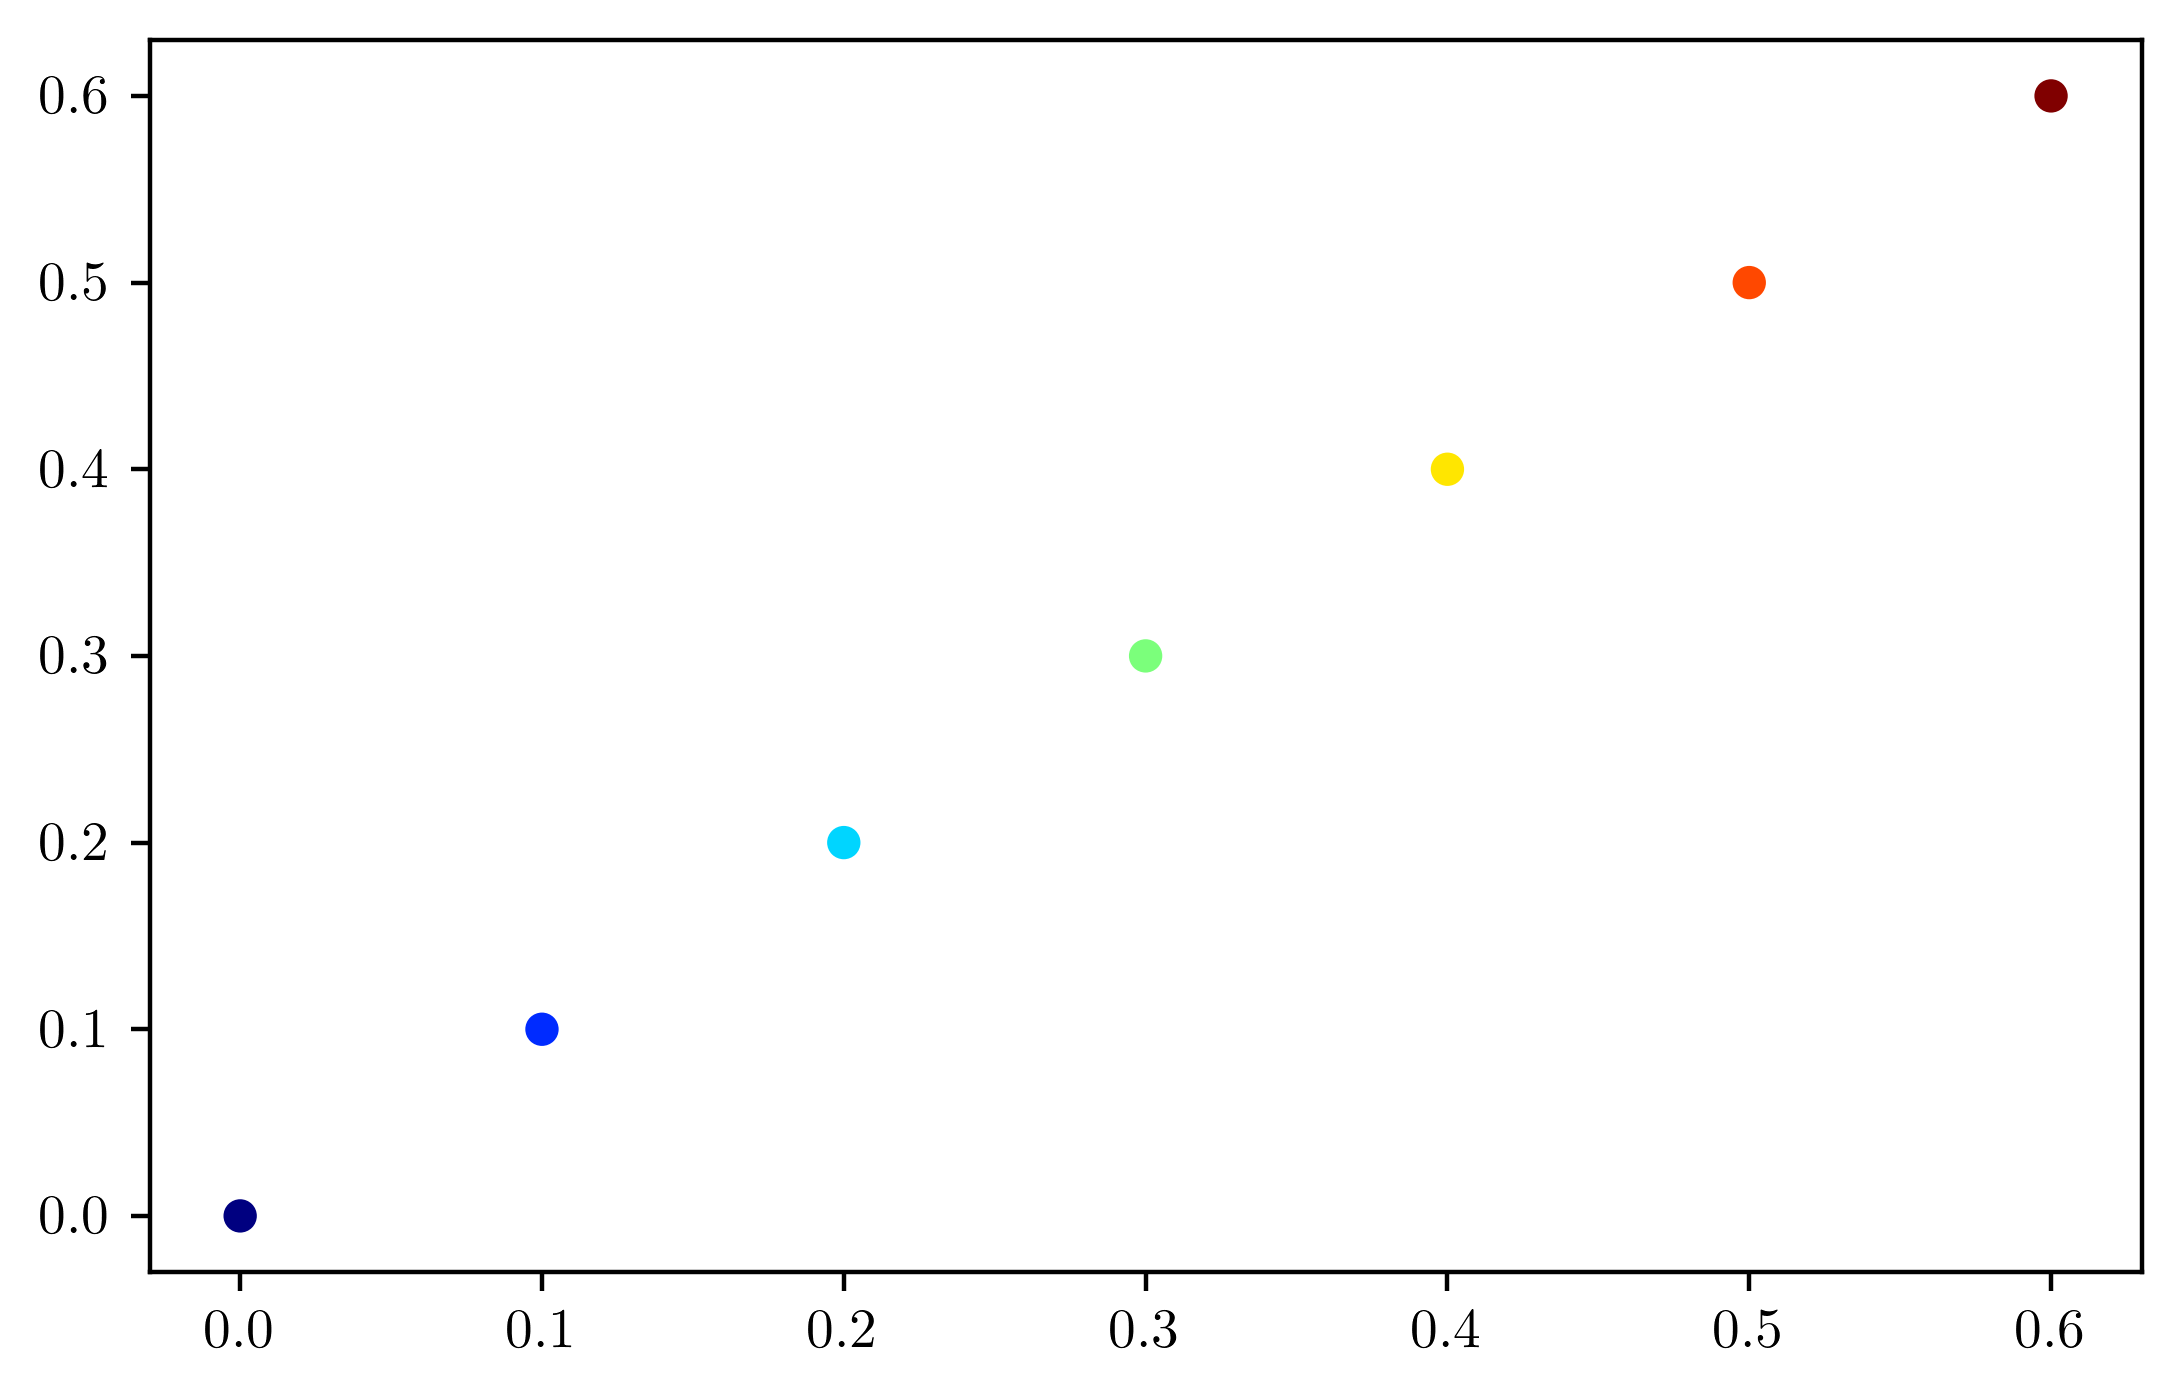

In [23]:
#MAXIMA

maximum = np.zeros(len(n_obs))
max_mass = np.zeros(len(n_obs))
max_omega = np.zeros(len(n_obs))
max_overshoot = np.zeros(len(n_obs))
maximum_time_norm = np.zeros(len(n_obs))
max_mass_time_norm = np.zeros(len(n_obs))
max_omega_time_norm = np.zeros(len(n_obs))
max_overshoot_time_norm = np.zeros(len(n_obs))


for i, star in enumerate(obs_subset):
    maximum[i] = np.max([el.posterior for el in model[i]])
    maximum_time_norm[i] = np.max([el.posterior_time_norm for el in model[i]])


for i,star in enumerate(obs_subset):
    for el in model[i]:
        if el.posterior == maximum[i]: 
            max_mass[i] = el.mass
#        max_mass_list = m
            max_omega[i] = el.omega
#        max_omega_list = w
            max_overshoot[i] = el.overshoot
#        max_overshoot_list = o

        if el.posterior_time_norm == maximum_time_norm[i]: 
            max_mass_time_norm[i] = el.mass
#        max_mass_list = m
            max_omega_time_norm[i] = el.omega
#        max_omega_list = w
            max_overshoot_time_norm[i] = el.overshoot
#        max_overshoot_list = o


maximum_likelihood = [max_overshoot,max_omega,max_mass]
maximum_likelihood_time_norm = [max_overshoot_time_norm,max_omega_time_norm,max_mass_time_norm]
#maximum_likelihood_list = [max_overshoot_list,max_omega_list,max_mass_list]

for i,star in enumerate(obs_subset):
    print('Nr:',i,"star",star[-1],"initial mass =",round(10**max_mass[i],4),"; omega =",round(max_omega[i],4),
          "; overshoot =",round(max_overshoot[i],4), "; peak likelihood = ", maximum[i])

for i,star in enumerate(obs_subset):
    print('Nr:',i,"star",star[-1],"initial mass =",round(10**max_mass_time_norm[i],4),"; omega =",round(max_omega_time_norm[i],4),
          "; overshoot =",round(max_overshoot_time_norm[i],4), "; peak likelihood = ", maximum_time_norm[i])
  

c = omega_range
cmap = mpl.cm.get_cmap('jet', len(c))
dummie_cax = plt.scatter(c, c, c=c, cmap=cmap);
# Aline figures out how not to show this useless plot




In [ ]:
print(max_mass_time_norm[0:-1])
a = np.hstack(10**max_mass_time_norm[0:-1])
_ = plt.hist(a, bins=10)  # arguments are passed to np.histogram

plt.xlabel(r" Initial mass [M$_{\odot}$]")
plt.ylabel(r" number")
plt.title("LMC sample")
#Text(0.5, 1.0, "Histogram with 'auto' bins")
#plt.savefig("LMC_sample_VLTF.png", dpi= 1200, bbox_inches='tight' )
plt.show()

a = np.hstack(max_omega_time_norm[0:-1])
_ = plt.hist(a, bins=len(omega_range))  # arguments are passed to np.histogram

plt.xlabel(r" $\omega/\omega_{crit}$")
plt.ylabel(r" number")
plt.title("LMC sample")
#Text(0.5, 1.0, "Histogram with 'auto' bins")
#plt.savefig("LMC_sample_omega_VLTF.png", dpi= 1200, bbox_inches='tight' )
plt.show()

print(max_overshoot_time_norm[0:-1])
a = np.hstack(max_overshoot_time_norm[0:-1]*0.335)
_ = plt.hist(a, bins=len(overshoot_range))  # arguments are passed to np.histogram

plt.xlabel(r" Overshooting $\alpha$")
plt.ylabel(r" number")
plt.title("LMC sample")
#Text(0.5, 1.0, "Histogram with 'auto' bins")
#plt.savefig("LMC_sample_overshoot_VLTF.png", dpi= 1200, bbox_inches='tight' )
plt.show()

In [ ]:
# PLOTS POST Vs MASS

width = 244*1
fig, ax = plt.subplots(len(overshoot_range),1, figsize=set_size(width, subplots=(len(overshoot_range), 1)))


majorLocator   = MultipleLocator(10)
majorLocator_x   = MultipleLocator(4)
minorLocator_x = MultipleLocator(1)
majorLocator_x2 = MultipleLocator(25)
minorLocator_x2 = MultipleLocator(5)
minorLocator_y3 = MultipleLocator(0.05)
minorLocator_y =  MultipleLocator(0.002)


for x in range(len(overshoot_range)):
    ax[x].set_xlabel(r" Initial mass [M$_{\odot}$]")
    ax[x].set_ylabel(r" Relative Likelihood[$\alpha_{ov}=$"+str(round(overshoot_range[x]*0.335,4))+"]")
    ax[x].tick_params(which= "both", direction="in")
    ax[x].tick_params(which='both', width=1.0)
    ax[x].tick_params(which='major', length=6)
    ax[x].tick_params(which='minor', length=2.5)
    
#PLOT
i = 0
counter = 0
for o,overshoot in enumerate(overshoot_range):
    for w,omega in enumerate(omega_range):
        x = [el.my_mass for el in model[i] if el.omega == omega and el.overshoot == overshoot]
        y = [el.posterior_time_norm for el in model[i] if el.omega == omega and el.overshoot == overshoot]
        ax[o].plot(x,y, ".-", c=cmap(w))
#        ax[o].semilogx(x,y, ".-", c=cmap(w))
#        xticks = np.arange(10,100,10)
#        ticklabels = ['10',' ','50',' ','100']
#        ticklabels = [str(jj) for jj in xticks]
#       ax[o].set_xticks(xticks,ticklabels)
#        ax[o].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#        ax[o].get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())       
#        ax[o].get_xaxis().get_major_formatter().set_useOffset(False)


    bar = plt.colorbar(dummie_cax, ticks=c,ax=ax[o])
    bar.set_label(r"$\omega/\omega_{crit}$")
    counter += 1
#plt.savefig("mass_vs_posterior_norm_XSU_1.png", dpi= 1200, bbox_inches='tight' )

In [ ]:
o = 1
overshoot = overshoot_range[o] 


width = 244*1
fig, ax = plt.subplots(1,1, figsize=set_size(width, subplots=(1, 1)))

majorLocator   = MultipleLocator(10)
majorLocator_x   = MultipleLocator(4)
minorLocator_x = MultipleLocator(1)
majorLocator_x2 = MultipleLocator(25)
minorLocator_x2 = MultipleLocator(5)
minorLocator_y3 = MultipleLocator(0.05)
minorLocator_y =  MultipleLocator(0.002)


ax.set_xlabel(r" Initial mass [M$_{\odot}$]")
ax.set_ylabel(r" Relative Likelihood[$\alpha_{ov}=$"+str(round(overshoot_range[o]*0.335,4))+"]")
ax.tick_params(which= "both", direction="in")
ax.tick_params(which='both', width=1.0)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=2.5)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())



for w,omega in enumerate(omega_range):
    x = [el.my_mass for el in model[i] if el.omega == omega and el.overshoot == overshoot]
    y = [el.posterior_time_norm for el in model[i] if el.omega == omega and el.overshoot == overshoot]
    ax.plot(x,y, ".-", c=cmap(w))

bar = plt.colorbar(dummie_cax, ticks=c,ax=ax)
bar.set_label(r"$\omega/\omega_{crit}$")
counter += 1
#plt.savefig("mass_vs_posterior_norm_XSU_1_"+str(o)+".png", dpi= 2*1200, bbox_inches='tight' )

In [ ]:
for i,star in enumerate(obs_subset):
    print("initial mass =",round(10**max_mass[i],4),"; omega =",round(max_omega[i],4),
      "; overshoot =",round(max_overshoot[i],4), "; peak likelihood = ", round(maximum[i],4))

c = omega_range
cmap = mpl.cm.get_cmap('jet', len(c))
dummie_cax = plt.scatter(c, c, c=c, cmap=cmap);
# Alin figures out how not to show this useless plot

In [ ]:
#mass_range = np.arange(0.9,2.075+0.001,steps_mass)
#mass_range = mass_range[24:32]

#PLOTS POST Vs OVERSHOOT
width = 244*1
nplots = len(mass_range)
print(nplots)
#nplots = 7
fig, ax = plt.subplots(nplots,1, figsize=set_size(width, subplots=(nplots, 1)))

majorLocator   = MultipleLocator(10)
majorLocator_x   = MultipleLocator(4)
minorLocator_x = MultipleLocator(1)
majorLocator_x2 = MultipleLocator(25)
minorLocator_x2 = MultipleLocator(5)
minorLocator_y3 = MultipleLocator(0.05)
minorLocator_y =  MultipleLocator(0.002)


#CHOOSE THE STAR by Number
#for i in n_obs:
#for i in range(len(n_obs)-5):

i = 0
print("OBJECT:", n_obs[i], "log initial mass =",round(max_mass[i],4),"; omega =",round(max_omega[i],4),
      "; overshoot =",round(max_overshoot[i],4), "; peak likelihood = ", round(maximum[i],4))

for m,mass in enumerate(mass_range):
    j = m
    ax[j].set_xlabel(r" Overshooting $\alpha$")
    ax[j].set_ylabel(r" Relative Likelihood[$log(M) = $"+str(round(mass_range[m],4))+"]")
    ax[j].tick_params(which= "both", direction="in")
    ax[j].tick_params(which='both', width=1.0)
    ax[j].tick_params(which='major', length=6)
    ax[j].tick_params(which='minor', length=2.5)

    for w,omega in enumerate(omega_range):
        x = [el.overshoot for el in model[i] if el.omega == omega and el.mass == mass]
        y = [el.likelihood for el in model[i] if el.omega == omega and el.mass == mass]
        try:
            ax[j].plot(x,y, ".-", c=cmap(w))
        except:
            print('error', j)
    bar = plt.colorbar(dummie_cax, ticks=c,ax=ax[j])
    bar.set_label(r"$\omega/\omega_{crit}$")
    counter += 1

#        ax[o].semilogx(x,y, ".-", c=cmap(w))
#        xticks = np.arange(10,100,10)
#        ticklabels = ['10',' ','50',' ','100']
#        ticklabels = [str(jj) for jj in xticks]
#       ax[o].set_xticks(xticks,ticklabels)
#        ax[o].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#        ax[o].get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())       
#        ax[o].get_xaxis().get_major_formatter().set_useOffset(False)
#plt.savefig("overshoot_diff_masses_XSU.png", dpi= 1200, bbox_inches='tight' )

In [24]:


#del integrate_UL, find_sigmas
try:
    del sys.modules["integrate_UL"]
    import integrate_UL
    from integrate_UL import construct_likelihood_2D
    from integrate_UL import find_x_for_y
    from integrate_UL import find_sigmas
    from integrate_UL import get_array
except:
    import integrate_UL
    from integrate_UL import construct_likelihood_2D
    from integrate_UL import find_x_for_y
    from integrate_UL import find_sigmas
    from integrate_UL import get_array
    
    


/vol/hal/halraid/luca/models/ULYSSES/tracks/stats_ulysses/integrate_UL.py:50: RuntimeWarning: divide by zero encountered in true_divide
  interps = [interp1d(y/maximum, x, bounds_error=False) for y, x in zip(ygroups, xgroups)]
/vol/hal/halraid/luca/models/ULYSSES/tracks/stats_ulysses/integrate_UL.py:50: RuntimeWarning: invalid value encountered in true_divide
  interps = [interp1d(y/maximum, x, bounds_error=False) for y, x in zip(ygroups, xgroups)]


contours for overshooting = 5.0 . Result: [[array(0.29898252), array(0.19509334), array(0.07278805)]]


/vol/hal/halraid/luca/models/ULYSSES/tracks/stats_ulysses/integrate_UL.py:50: RuntimeWarning: divide by zero encountered in true_divide
  interps = [interp1d(y/maximum, x, bounds_error=False) for y, x in zip(ygroups, xgroups)]
/vol/hal/halraid/luca/models/ULYSSES/tracks/stats_ulysses/integrate_UL.py:50: RuntimeWarning: invalid value encountered in true_divide
  interps = [interp1d(y/maximum, x, bounds_error=False) for y, x in zip(ygroups, xgroups)]


contours for overshooting = 5.0 . Result: [[array(0.29898252), array(0.19509334), array(0.07278805)], [array(0.29930429), array(0.19601483), array(0.0753253)]]
contours for overshooting = 5.0 . Result: [[array(0.29898252), array(0.19509334), array(0.07278805)], [array(0.29930429), array(0.19601483), array(0.0753253)], [array(0.30165247), array(0.19662127), array(0.07496642)]]


/vol/hal/halraid/luca/models/ULYSSES/tracks/stats_ulysses/integrate_UL.py:50: RuntimeWarning: divide by zero encountered in true_divide
  interps = [interp1d(y/maximum, x, bounds_error=False) for y, x in zip(ygroups, xgroups)]
/vol/hal/halraid/luca/models/ULYSSES/tracks/stats_ulysses/integrate_UL.py:50: RuntimeWarning: invalid value encountered in true_divide
  interps = [interp1d(y/maximum, x, bounds_error=False) for y, x in zip(ygroups, xgroups)]


contours for overshooting = 5.0 . Result: [[array(0.29898252), array(0.19509334), array(0.07278805)], [array(0.29930429), array(0.19601483), array(0.0753253)], [array(0.30165247), array(0.19662127), array(0.07496642)], [array(0.31348385), array(0.20370622), array(0.06479735)]]


/vol/hal/halraid/luca/models/ULYSSES/tracks/stats_ulysses/integrate_UL.py:50: RuntimeWarning: divide by zero encountered in true_divide
  interps = [interp1d(y/maximum, x, bounds_error=False) for y, x in zip(ygroups, xgroups)]
/vol/hal/halraid/luca/models/ULYSSES/tracks/stats_ulysses/integrate_UL.py:50: RuntimeWarning: invalid value encountered in true_divide
  interps = [interp1d(y/maximum, x, bounds_error=False) for y, x in zip(ygroups, xgroups)]
/vol/hal/halraid/luca/models/ULYSSES/tracks/stats_ulysses/integrate_UL.py:50: RuntimeWarning: divide by zero encountered in true_divide
  interps = [interp1d(y/maximum, x, bounds_error=False) for y, x in zip(ygroups, xgroups)]


contours for overshooting = 5.0 . Result: [[array(0.29898252), array(0.19509334), array(0.07278805)], [array(0.29930429), array(0.19601483), array(0.0753253)], [array(0.30165247), array(0.19662127), array(0.07496642)], [array(0.31348385), array(0.20370622), array(0.06479735)], [array(0.32672296), array(0.21244338), array(0.07054948)]]


/vol/hal/halraid/luca/models/ULYSSES/tracks/stats_ulysses/integrate_UL.py:50: RuntimeWarning: invalid value encountered in true_divide
  interps = [interp1d(y/maximum, x, bounds_error=False) for y, x in zip(ygroups, xgroups)]


contours for overshooting = 5.0 . Result: [[array(0.29898252), array(0.19509334), array(0.07278805)], [array(0.29930429), array(0.19601483), array(0.0753253)], [array(0.30165247), array(0.19662127), array(0.07496642)], [array(0.31348385), array(0.20370622), array(0.06479735)], [array(0.32672296), array(0.21244338), array(0.07054948)], [array(0.34552422), array(0.22834413), array(0.08282101)]]
contours for overshooting = 5.0 . Result: [[array(0.29898252), array(0.19509334), array(0.07278805)], [array(0.29930429), array(0.19601483), array(0.0753253)], [array(0.30165247), array(0.19662127), array(0.07496642)], [array(0.31348385), array(0.20370622), array(0.06479735)], [array(0.32672296), array(0.21244338), array(0.07054948)], [array(0.34552422), array(0.22834413), array(0.08282101)], [array(0.364366), array(0.23733087), array(0.08308783)]]
contours for overshooting = 5.0 . Result: [[array(0.29898252), array(0.19509334), array(0.07278805)], [array(0.29930429), array(0.19601483), array(0.07

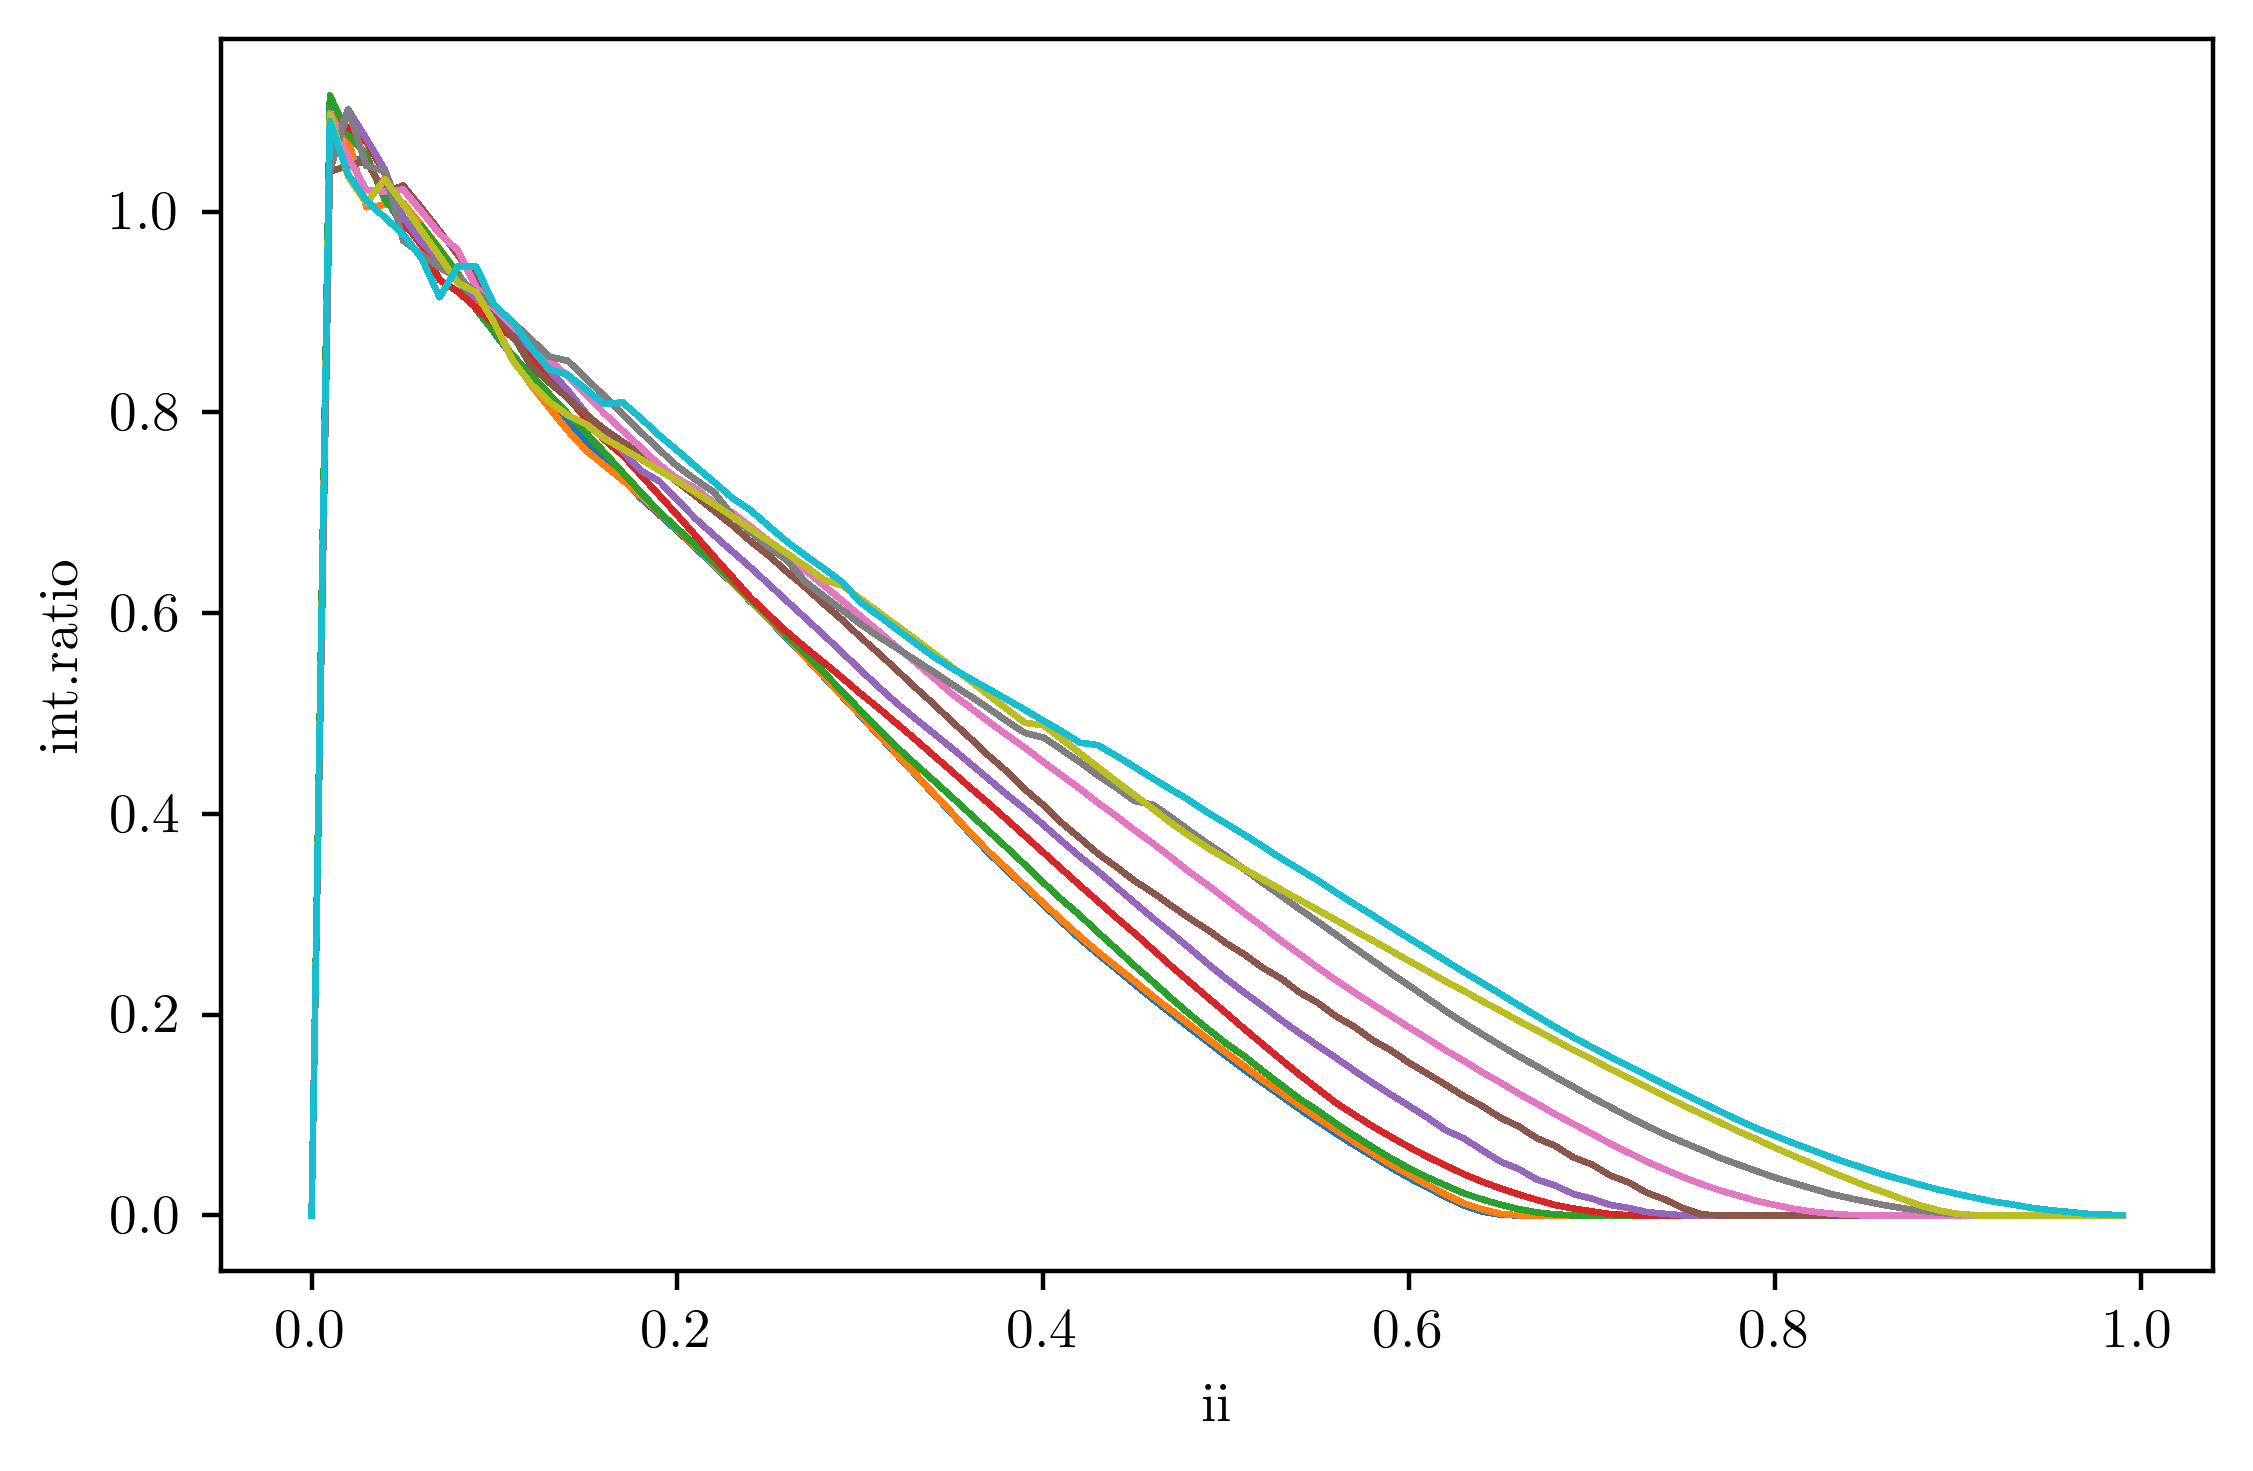

In [25]:
start_time = time.time()
i=0

#contours = find_sigmas(model[i],maximum[i],mass_range,'mass',omega_range,'omega',max_overshoot[i],overshoot_range,'overshoot','posterior')
contours = find_sigmas(model[i],maximum_time_norm[i],mass_range,'mass',omega_range,'omega',max_overshoot[i],overshoot_range,'overshoot','posterior_time_norm')
print( " %s minutes for execution ---" % str(float((time.time() - start_time))/60.0))

In [26]:
def levels_sigma(overshoot):
    flag = []
    flag.append(contours[overshoot][2])
    flag.append(contours[overshoot][1])
    flag.append(contours[overshoot][0])
    flag.append(1)
    return flag


#CONTOURS FOR SINGLE STARs
print(contours)
i=0

width =244*1;
fig, ax = plt.subplots(len(overshoot_range),1, figsize=set_size(width, subplots=(len(overshoot_range), 1)))

majorLocator   = MultipleLocator(10)
majorLocator_x   = MultipleLocator(4)
minorLocator_x = MultipleLocator(1)
majorLocator_x2 = MultipleLocator(25)
minorLocator_x2 = MultipleLocator(5)
minorLocator_y3 = MultipleLocator(0.05)
minorLocator_y =  MultipleLocator(0.002)


for x in range(len(overshoot_range)):
    ax[x].set_xlabel(r" log(M$$/M$_{\odot}$]")
    ax[x].set_ylabel(r" $\omega/\omega_{crit}$")
    ax[x].set_title(r" Overshooting="+str(round(overshoot_range[x]*0.335,4)))
    ax[x].tick_params(which= "both", direction="in")
    ax[x].tick_params(which='both', width=1.0)
    ax[x].tick_params(which='major', length=6)
    ax[x].tick_params(which='minor', length=2.5)
    ax[x].xaxis.set_minor_locator(AutoMinorLocator())
    ax[x].yaxis.set_minor_locator(AutoMinorLocator())

counter = 0
for o,overshoot in enumerate(overshoot_range):
    foo = np.array([el for el in model[i] if round(el.overshoot,4) == overshoot])
#    bar = construct_likelihood_2D(foo,omega_range,'omega',"posterior")/maximum[i]
    bar = construct_likelihood_2D(foo,omega_range,'omega',"posterior_time_norm")/maximum_time_norm[i]
    img=ax[o].contourf(
        np.array(mass_range),np.array(omega_range),
        np.array(bar), 
        vmin=0, vmax=1, cmap="RdBu",levels=np.linspace(levels_sigma(o)[0], 1.0, 11))
    img2=ax[o].contour(
        np.array(mass_range),np.array(omega_range),
        np.array(bar), 
        vmin=0, vmax=1, levels = levels_sigma(o),linestyle = ('dotted','solid','solid'),colors = 'black')
#    img=ax[overshoot].contourf(
#        np.array(my_mass[overshoot]),np.array(HR_initial_omega[overshoot]),np.array(likelihood[overshoot]/maximum), 
#        vmin=0, vmax=1, cmap="RdBu",levels = levels_sigma(overshoot))
#    ax[overshoot].errorbar(10**maximum_likelihood[2], maximum_likelihood[1],
#     xerr = asymmetric_mass_error, yerr = asymmetric_omega_error , marker='o', color="black")
    fig.colorbar(img,ax=ax[o]);
    counter += 1
plt.tight_layout()
#plt.savefig("contours_XSU.png", dpi= 1200, bbox_inches='tight' )
#    plt.show()

[[array(0.29898252), array(0.19509334), array(0.07278805)], [array(0.29930429), array(0.19601483), array(0.0753253)], [array(0.30165247), array(0.19662127), array(0.07496642)], [array(0.31348385), array(0.20370622), array(0.06479735)], [array(0.32672296), array(0.21244338), array(0.07054948)], [array(0.34552422), array(0.22834413), array(0.08282101)], [array(0.364366), array(0.23733087), array(0.08308783)], [array(0.37418924), array(0.23446755), array(0.06575386)], [array(0.38335353), array(0.23524236), array(0.07202846)], [array(0.39348828), array(0.24784218), array(0.06934397)]]
width, height 3.3762280337622803 33.385978858165075
10.0


/users/luca/.local/lib/python3.6/site-packages/ipykernel_launcher.py:49: UserWarning: The following kwargs were not used by contour: 'linestyle'


RuntimeError: latex was not able to process the following string:
b' log(M$$/M$_{\\\\odot}$]'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/users/luca/.cache/matplotlib/tex.cache/c1a949271837fa340975d52f6271a1c2.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 82 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(./c1a949271837fa340975d52f6271a1c2.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Display math should end with $$.
<to be read again> 
                   _
l.19 {\rmfamily  log(M$$/M$_
                            {\odot}$]}
No pages of output.
Transcript written on c1a949271837fa340975d52f6271a1c2.log.




RuntimeError: latex was not able to process the following string:
b' log(M$$/M$_{\\\\odot}$]'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/users/luca/.cache/matplotlib/tex.cache/c1a949271837fa340975d52f6271a1c2.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 82 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(./c1a949271837fa340975d52f6271a1c2.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Display math should end with $$.
<to be read again> 
                   _
l.19 {\rmfamily  log(M$$/M$_
                            {\odot}$]}
No pages of output.
Transcript written on c1a949271837fa340975d52f6271a1c2.log.




<Figure size 1350.49x13354.4 with 20 Axes>

In [ ]:

#overshoot = 1.0
#o = list(overshoot_range).index(overshoot)
#-
o = 1
overshoot = overshoot_range[o]


fig, ax = plt.subplots(1,1, figsize=set_size(width, subplots=(1, 1)))

majorLocator   = MultipleLocator(10)
majorLocator_x   = MultipleLocator(4)
minorLocator_x = MultipleLocator(1)
majorLocator_x2 = MultipleLocator(25)
minorLocator_x2 = MultipleLocator(5)
minorLocator_y3 = MultipleLocator(0.05)
minorLocator_y =  MultipleLocator(0.002)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.set_xlabel(r" M/M$_{\odot}$")
ax.set_ylabel(r" $\omega/\omega_{crit}$")
ax.set_title(r" $\alpha_{\rm ov}$="+str(round(overshoot_range[o]*0.335,4)))
ax.tick_params(which= "both", direction="in")
ax.tick_params(which='both', width=1.0)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=2.5)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

#ax.plot(np.array(mass_range),np.log10(likelihood_combined))
#ax.plot(np.array(mass_range),12+np.log10(salpeter1955(10**mass_range)),c="red")





foo = np.array([el for el in model[i] if round(el.overshoot,4) == overshoot])
#bar = construct_likelihood_2D(foo,omega_range,'omega',"posterior")/maximum[i]
bar = construct_likelihood_2D(foo,omega_range,'omega',"posterior_time_norm")
max_bar = np.max(bar)
print(levels_sigma(o))
img=ax.contourf(10**np.array(mass_range),np.array(omega_range),np.array(bar/max_bar),vmin=0, vmax=1, cmap="RdBu",levels=np.linspace(levels_sigma(o)[0]*maximum_time_norm[i]/max_bar, 1.0, 11))
img2=ax.contour(10**np.array(mass_range),np.array(omega_range),np.array(bar/max_bar), 
        vmin=0, vmax=1,  levels = np.array(levels_sigma(o))*maximum_time_norm[i]/max_bar,linewidths=0.4,colors = 'black')
fig.colorbar(img,ax=ax);
plt.tight_layout()
plt.xlim([10,100])
#plt.ylim([0,0.4])
plt.savefig("contours_UL.png", dpi= 1200, bbox_inches='tight' )

#

width, height 3.3762280337622803 3.3385978858165077
1.0
[array(0.0753253), array(0.19601483), array(0.29930429), 1]


In [38]:
for i, star in enumerate(obs_subset):
    maximum[i] = np.max([el.posterior for el in model[i] if el.overshoot == overshoot_range[1]])
    maximum_time_norm[i] = np.max([el.posterior_time_norm for el in model[i] if el.overshoot == overshoot_range[1]])


for i,star in enumerate(obs_subset):
    for el in model[i]:
        if el.posterior == maximum[i]: 
            max_mass[i] = el.mass
#        max_mass_list = m
            max_omega[i] = el.omega
#        max_omega_list = w
            max_overshoot[i] = el.overshoot
#        max_overshoot_list = o

        if el.posterior_time_norm == maximum_time_norm[i]: 
            max_mass_time_norm[i] = el.mass
#        max_mass_list = m
            max_omega_time_norm[i] = el.omega
#        max_omega_list = w
            max_overshoot_time_norm[i] = el.overshoot
#        max_overshoot_list = o

maximum_likelihood = [max_overshoot,max_omega,max_mass]
maximum_likelihood_time_norm = [max_overshoot_time_norm,max_omega_time_norm,max_mass_time_norm]
#maximum_likelihood_list = [max_overshoot_list,max_omega_list,max_mass_list]

for i,star in enumerate(obs_subset):
    print('Nr:',i,"star",star[-1],"initial mass =",round(10**max_mass[i],4),"; omega =",round(max_omega[i],4),
          "; overshoot =",round(max_overshoot[i],4), "; peak likelihood = ", maximum[i])

for i,star in enumerate(obs_subset):
    print('Nr:',i,"star",star[-1],"initial mass =",round(10**max_mass_time_norm[i],4),"; omega =",round(max_omega_time_norm[i],4),
          "; overshoot =",round(max_overshoot_time_norm[i],4), "; peak likelihood = ", maximum_time_norm[i])
  

Nr: 0 star 1 initial mass = 42.1697 ; omega = 0.2 ; overshoot = 1.0 ; peak likelihood =  15.15153103476094
Nr: 0 star 1 initial mass = 42.1697 ; omega = 0.2 ; overshoot = 1.0 ; peak likelihood =  28000.31607547483


In [ ]:
c = omega_range
cmap = mpl.cm.get_cmap('jet', len(c))
dummie_cax = plt.scatter(c, c, c=c, cmap=cmap);

In [ ]:
# HR DIAGRAM + DATA 
width =244*1;
fig, ax = plt.subplots(figsize=set_size(width,subplots=(1, 1)))


bar = plt.colorbar(dummie_cax, ticks=c)
bar.set_label(r"$\omega/\omega_{crit}$")

for o,overshoot in enumerate(overshoot_range):

    models_fixed_over = [el for el in modelHR if el.overshoot == overshoot_range[o] and el.omega < 0.7]

    #for el in model:
    for el in models_fixed_over:
            ax.plot(10**el.HR_Teff,el.HR_L,c=cmap(el.omega/np.max(omega_range)),zorder = 0)

    for i,star in enumerate(obs_subset):
    #for i in range(len(n_obs)):  
        ax.errorbar(10**np.log10(star[0]), star[1],  0.1, 1000 , marker='o', color="black")
        ax.set_xlabel(r" log(T$_{eff}$/K)")
        ax.set_xlim([2000,80000])
        #ax.set_ylabel(r" log (L/L$_{\odot})\quad  \alpha_{OV}=$"+str("{:5.4f}".format(overshoot_range[factor]*0.335)))
        ax.set_ylabel(r" log (L/L$_{\odot}$)")
    ax.invert_xaxis()
#    plt.savefig("HR_overshoot_"+str(overshoot)+".png", dpi= 1200, bbox_inches='tight' )


#plt.savefig("HR_overshoot_full.png", dpi= 1200, bbox_inches='tight' )

#ax.legend(loc="best")
#plt.show()

In [ ]:
overshoot = 1.0
o = list(overshoot_range).index(overshoot)

width =244*1;
fig, ax = plt.subplots(figsize=set_size(width,subplots=(1, 1)))


bar = plt.colorbar(dummie_cax, ticks=c)
bar.set_label(r"$\omega/\omega_{crit}$")

models_fixed_over = [el for el in modelHR if el.overshoot == overshoot_range[o] and el.omega < 0.7 and el.omega > 0.1]

#for el in model:
for el in models_fixed_over:
        ax.plot(10**el.HR_Teff,el.HR_L,c=cmap(el.omega/np.max(omega_range)),zorder = 0)


for i,star in enumerate(obs_subset):
#for i in range(len(n_obs)):  
    ax.errorbar(10**np.log10(star[0]), star[1],  0.1, 1000 , marker='o', color="black")
    ax.set_xlabel(r" log(T$_{eff}$/K)")
    ax.set_xlim([2000,80000])
    #ax.set_ylabel(r" log (L/L$_{\odot})\quad  \alpha_{OV}=$"+str("{:5.4f}".format(overshoot_range[factor]*0.335)))
    ax.set_ylabel(r" log (L/L$_{\odot}$)")
ax.errorbar(10**np.log10(obs_subset[0][0]), obs_subset[0][1],  0.1, 1000 , marker='*', color="red")
ax.invert_xaxis()
#    plt.savefig("HR_overshoot_"+str(overshoot)+".png", dpi= 1200, bbox_inches='tight' )


#plt.savefig("HR_teststar_XSU.png", dpi= 1200, bbox_inches='tight' )

In [ ]:
#COMBINE/PRODUCT of posteriors over MASS

def collapse_over_mass(model,mass_range,omega_range,overshoot_range,i):
    likelihood_collapsed = []  
    for m,mass in enumerate(mass_range):
        dumb3 = []
        for w,omega in enumerate(omega_range):
            dumb=0
            dumb = [el.posterior for el in model if el.omega == omega and el.mass == mass]
            dumb3.append(sum(dumb))
        
        likelihood_collapsed.append(sum(dumb3))                
    return likelihood_collapsed




likelihood_mass = np.zeros((len(n_obs),len(mass_range)))

#for i in n_obs:
for i,star in enumerate(obs_subset):
    likelihood_mass[i] = collapse_over_mass(model[i],mass_range,omega_range,overshoot_range,i)

likelihood_mass = np.array(likelihood_mass)



#--------------------------------------------------------------------------

In [ ]:

width =244*1;
fig, ax = plt.subplots(1,1, figsize=set_size(width, subplots=(1, 1)))

majorLocator   = MultipleLocator(10)
majorLocator_x   = MultipleLocator(4)
minorLocator_x = MultipleLocator(1)
majorLocator_x2 = MultipleLocator(25)
minorLocator_x2 = MultipleLocator(5)
minorLocator_y3 = MultipleLocator(0.05)
minorLocator_y =  MultipleLocator(0.002)

for i,star in enumerate(obs_subset):          
    ax.plot(np.array(mass_range),likelihood_mass[i])
ax.set_xlabel(r" Initial Mass $(M/M_{\odot})$")
ax.set_ylabel(r" Each Posterior")
ax.tick_params(which= "both", direction="in")
ax.tick_params(which='both', width=1.0)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=2.5)
plt.show()



fig, ax = plt.subplots(1,1, figsize=set_size(width, subplots=(1, 1)))

majorLocator   = MultipleLocator(10)
majorLocator_x   = MultipleLocator(4)
minorLocator_x = MultipleLocator(1)
majorLocator_x2 = MultipleLocator(25)
minorLocator_x2 = MultipleLocator(5)
minorLocator_y3 = MultipleLocator(0.05)
minorLocator_y =  MultipleLocator(0.002)


likelihood_combined = []
for m, mass in enumerate(mass_range):
    flag = 0
    for i,star in enumerate(obs_subset):
        flag += likelihood_mass[i][m]
    likelihood_combined.append(flag)
likelihood_combined = np.array(likelihood_combined)
    
    
ax.set_xlabel(r" log Initial Mass")
ax.set_ylabel(r" log Sum Posterior")
ax.tick_params(which= "both", direction="in")
ax.tick_params(which='both', width=1.0)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=2.5)
ax.plot(np.array(mass_range),np.log10(likelihood_combined))
ax.plot(np.array(mass_range),12+np.log10(salpeter1955(10**mass_range)),c="red")

#--------------------------------------------------------------------------

In [ ]:



likelihood_over = np.zeros((len(n_obs),len(overshoot_range)))
likelihood_over_posterior = np.zeros((len(n_obs),len(overshoot_range)))

#for i in n_obs:
for i,star in enumerate(obs_subset):
    likelihood_over[i] = collapse_over_overshoot_posterior(model[i],mass_range,omega_range,overshoot_range,i,'posterior')
    likelihood_over_posterior[i] = collapse_over_overshoot_posterior(model[i],mass_range,omega_range,overshoot_range,i,'posterior_time_norm')    

In [ ]:
#PLOT all posteriors for stars

make_plot(np.array(overshoot_range)*0.335,likelihood_over_posterior,name_x = r" Overshooting $\alpha$", name_y = r" Product Posterior", number_plots = len(obs_subset))


In [ ]:
#-------------------------
likelihood_combined = []
for o, overshoot in enumerate(overshoot_range):
    flag = 1
    for i,star in enumerate(obs_subset):
        flag=flag*likelihood_over_posterior[i][o]
#       if flag == 0: break
    likelihood_combined.append(flag)

make_plot(np.array(overshoot_range)*0.335,np.array(likelihood_combined)/np.max(likelihood_combined),name_x = r" Overshooting $\alpha$", name_y = r" Product Posterior")
    
#plt.savefig("overshoot_vs_posterior_XSU_COMBINED_post.png", dpi= 1200, bbox_inches='tight' )

In [ ]:
massive = [0.83784816, 0.89904044, 0.92741596, 1.        , 0.99032955,
       0.86591049, 0.921562  , 0.70047486, 0.4182263 , 0.54704231]

In [ ]:
massive2 = [8.32394411e-10, 3.39971048e-06, 4.04015619e-03, 5.48505994e-01,
       1.00000000e+00, 2.24290704e-02, 9.64838086e-04, 1.05165471e-12,
       3.85051694e-21, 4.58139207e-29]

In [ ]:
massive3 = [1.64263855e-08, 1.00000000e+00, 4.49574463e-02, 3.02098341e-02,
       3.40633621e-02, 3.02859865e-02, 2.24322227e-02, 1.46671496e-09,
       4.21313444e-16, 1.18658159e-25]

In [ ]:
massive4 = [1.00000000e+000, 6.33160361e-217, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000]

In [ ]:
#COMBINE/PRODUCT of posteriors over OVERSHOOT
def collapse_over_overshoot_combined(model,mass_range,omega_range,overshoot_range):
    likelihood_collapsed = []  
    for o,overshoot in enumerate(overshoot_range):
        dumb3 = []
        for m,mass in enumerate(mass_range):  
            #array of omegas
            dumb = np.array([el.posterior_combined for el in model if el.mass == mass and el.overshoot == overshoot])
            if any(a == 0 for a in dumb): print('su')
            dumb3.append(sum(dumb))

        likelihood_collapsed.append(sum(dumb3))
        print(likelihood_collapsed[-1])
    return np.array(likelihood_collapsed)

likelihood_over = collapse_over_overshoot_combined(model,mass_range,omega_range,overshoot_range)

make_plot(np.array(overshoot_range)*0.335,np.log10(likelihood_over),name_x = r" Overshooting $\alpha$", name_y = r" Product Posterior")


In [ ]:
#BOOTSTRAP
#MLT
#take IACOB





In [ ]:
#BOOOTSTRAP

#obs_subset = original_obs_subset.copy()
bootstrap = []
max_bootstrap = []
n_boot = 100000

while n_boot>0:
    n_boot -= 1
    
    boot_subset = random.choices(obs_subset, k=int(len(obs_subset)/2))
    

#    likelihood_over = np.zeros((len(boot_subset),len(overshoot_range)))
    likelihood_over_boot = np.zeros((len(boot_subset),len(overshoot_range)))


    #for i in n_obs:
    for i,star in enumerate(boot_subset):
        j = obs_subset.index(star)
#        likelihood_over[i] = collapse_over_overshoot_posterior(model[j],mass_range,omega_range,overshoot_range,i,'posterior')
#       likelihood_over_posterior[i] = collapse_over_overshoot_posterior(model[j],mass_range,omega_range,overshoot_range,i,'posterior_time_norm')    
        likelihood_over_boot[i] = likelihood_over_posterior[j]

        
    likelihood_combined = []
    for o, overshoot in enumerate(overshoot_range):
        flag = 1
        for i,star in enumerate(boot_subset):
            flag=flag*likelihood_over_boot[i][o]
    #       if flag == 0: break
        likelihood_combined.append(flag)
    maximum_boot = np.max(likelihood_combined)
    bootstrap.append(likelihood_combined/maximum_boot)
    top_likelihood = overshoot_range[likelihood_combined.index(maximum_boot)]*0.335
    max_bootstrap.append(top_likelihood)
        

In [ ]:
a = np.hstack(max_bootstrap)
bins = len(list(set(a)))
_ = plt.hist(a, bins=bins)  # arguments are passed to np.histogram
plt.xlim([overshoot_range[0]*0.335,overshoot_range[-1]*0.335])
plt.xlabel(r" Initial mass [M$_{\odot}$]")
plt.ylabel(r" number")
plt.title("VLTF sample")
#plt.savefig("LMC_sample_VLTF.png", dpi= 1200, bbox_inches='tight' )
plt.show()

In [ ]:
make_plot(np.array(overshoot_range)*0.335,np.array(bootstrap),name_x = r" Overshooting $\alpha$", name_y = r" Product Posterior", number_plots = len(bootstrap))

#-------------------------

#for likelihood_combined in bootstrap:
#    bootstrap_combined = np.array(bootstrap_combined)*np.array(likelihood_combined)
#    ax.plot(np.array(overshoot_range)*0.335,np.array(likelihood_combined)/np.max(likelihood_combined))
#    make_plot(np.array(overshoot_range)*0.335,np.array(likelihood_combined)/np.max(likelihood_combined),name_x = r" Overshooting $\alpha$", name_y = r" Product Posterior")
#ax.legend()
#plt.show()


#make_plot(np.array(overshoot_range)*0.335,np.array(bootstrap_combined)/np.max(bootstrap_combined),name_x = r" Overshooting $\alpha$", name_y = r" Product Posterior")